In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate https://astrostatistics.psu.edu/datasets/censor.dat

--2020-04-21 18:37:57--  https://astrostatistics.psu.edu/datasets/censor.dat
Resolving astrostatistics.psu.edu (astrostatistics.psu.edu)... 168.62.182.234
Connecting to astrostatistics.psu.edu (astrostatistics.psu.edu)|168.62.182.234|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3932 (3.8K)
Saving to: ‘censor.dat.1’

censor.dat.1        100%[===================>]   3.84K  --.-KB/s    in 0.001s  

2020-04-21 18:37:57 (6.53 MB/s) - ‘censor.dat.1’ saved [3932/3932]



In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./censor.dat', delim_whitespace=True)
df

,Star,Type,Teff,Ind_Be,logN_Be,sig_Be,Ind_Li,logN_Li
0,BD-103166,1,5320,1,0.50,NaN,1,NaN
1,HD_6434,1,5835,1,1.08,0.10,0,0.80
2,HD_9826,1,6212,1,1.05,0.13,1,2.55
3,HD_10647,1,6143,1,1.19,0.10,1,2.80
4,HD_10697,1,5641,1,1.31,0.13,1,1.96
...,...,...,...,...,...,...,...,...
63,HD_85117,2,6167,1,1.11,0.11,1,2.64
64,HD_189567,2,5765,1,1.06,0.10,0,0.82
65,HD_192310,2,5069,0,0.60,NaN,0,0.20
66,HD_211415,2,5890,1,1.12,0.10,1,1.92


In [5]:
from scipy.stats.distributions import beta

In [6]:
np.count_nonzero(df.Type == 1)
len(df)

68

In [10]:
training_size = 0.8

training_sel = np.random.choice((True, False), p=(training_size, 1-training_size), size=len(df))

In [11]:
training_data = df[training_sel]
validation_data = df[~training_sel]

In [12]:
print(len(training_data), len(validation_data))

56 12


In [13]:
N = len(training_data)
z = 0
for i in range(N):
    if training_data['Type'].iloc[i] == 1:
        z += 1

In [14]:
likelihood = np.linspace(0,1,100)

In [15]:
def plot_beta_dist(a=1, b=1, **kwarg):
    plt.plot(likelihood, beta.pdf(likelihood, a, b))
    plt.xlim(0,1)
    plt.ylim(0,3)
    #plt.xlabel(r'$\likelihood$')
    #plt.ylabel(r'$p(\likelihood|a={}, b={})$'.format(a,b))

Text(0.5, 1.0, 'prior')

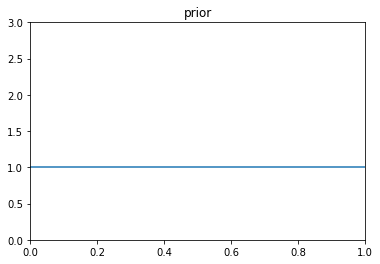

In [16]:
a = 1
b = 1

N = 0
z = 0

plot_beta_dist(z + a, N - z + b, label='prior')
plt.title('prior')

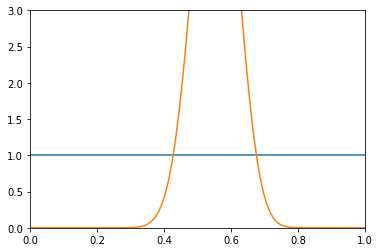

In [18]:
a = 1
b = 1

N = 0
z = 0

plot_beta_dist(z + a, N - z + b, label='prior')

N = len(training_data)
z = 0  #initialize z
for i in range(N):
    if training_data['Type'].iloc[i] == 1:
        z += 1

plot_beta_dist(z + a, N - z + b, label='N={}, z={}'.format(N, z))


In [19]:
print(N, z)

56 31


(0, 7)

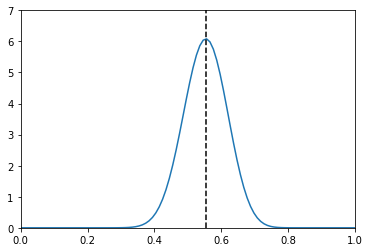

In [21]:
plot_beta_dist(z + a, N - z + b, label='N={}, z={}'.format(N, z))
plt.axvline( z/N  , ls='--', color='k')
plt.ylim(0,7)